# Feature Engineering

- One hot encoding: converting categories into individual features that are either 0 or 1
    + we greatly increase our feature set.
    + but no ordinal relationship imposed by int mapping.
    + consider dummy variable trap (having two features where only one is neccessary)
    + not too easy to encode new categories.

# Dealing with outliers

It's often better to remove extreme datapoints as they skew results.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [4]:
sample = create_ages()

In [5]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

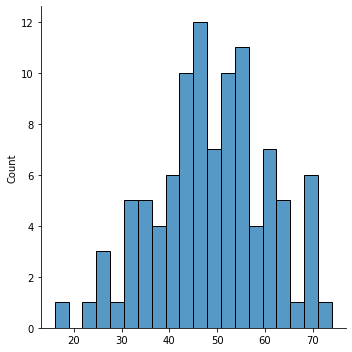

In [7]:
# Check dist of data set.
sns.displot(sample, bins=20)

<AxesSubplot:>

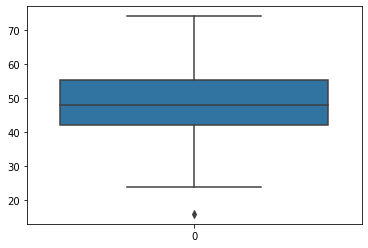

In [11]:
# Use a more robust methodology.
sns.boxplot(data=sample)

In [12]:
ser = pd.Series(sample)

In [13]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [14]:
# IQR = range between 75% percentile and 25th
IQR = 55.25000 - 42.00000

In [15]:
lower_limit = 42.0 - (1.5 * IQR) # Specify an arbitrary lower lim

In [16]:
upper_limit = 55.25 + (1.5 * IQR) # Specify an arbitrary upper lim

In [17]:
ser > lower_limit

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

In [19]:
ser[ser > lower_limit] # Get's rid of outlier

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [24]:
# Percentile call! Get our percentiles programatically, more elegantly.
# Tuple unpack!
q75, q25 = np.percentile(
    a=sample,
    q=[75, 25]
)

In [22]:
q75

55.25

In [23]:
q25

42.0

In [25]:
# Do a visualisation and we can decide from there.
df = pd.read_csv('../DATA/Ames_Housing_Data.csv')

In [26]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [27]:
df.corr

<bound method DataFrame.corr of             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     526301100           20        RL         141.0     31770   Pave   NaN   
1     526350040           20        RH          80.0     11622   Pave   NaN   
2     526351010           20        RL          81.0     14267   Pave   NaN   
3     526353030           20        RL          93.0     11160   Pave   NaN   
4     527105010           60        RL          74.0     13830   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2925  923275080           80        RL          37.0      7937   Pave   NaN   
2926  923276100           20        RL           NaN      8885   Pave   NaN   
2927  923400125           85        RL          62.0     10441   Pave   NaN   
2928  924100070           20        RL          77.0     10010   Pave   NaN   
2929  924151050           60        RL          74.0      9627   Pave   NaN   

     Lot Shape Land

In [37]:
# Get features most strongly correlated with SalePrice!
# Here we can check agains sales price to get the main outliers.
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

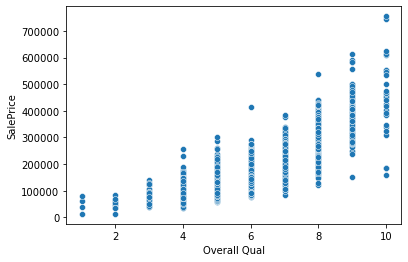

In [33]:
# There are a few outlier datapoints.
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

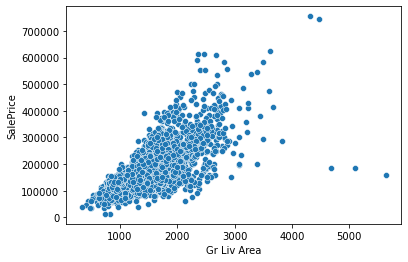

In [34]:
# There are a few outlier datapoints.
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [36]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)] # Got the outliers. They don't follow the trend.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [38]:
outliers = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

In [39]:
outliers

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [40]:
outliers.index

Int64Index([1498, 2180, 2181], dtype='int64')

In [41]:
# Drop the 3 outlier rows!
df = df.drop(outliers.index, axis=0) 

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

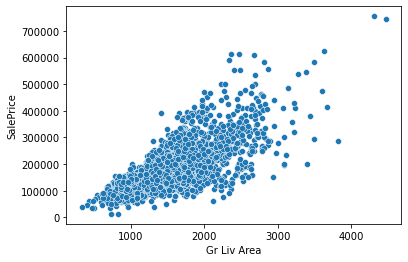

In [42]:
# Outliers cleaned!
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [43]:
# Save my vesrion of cleaned outliers
df.to_csv('../DATA/Ames_outliers_removed_mine.csv')

# Dealing with Missing Data

In [44]:
# Print txt file (with worries about cleanup)
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
df = pd.read_csv('../DATA/Ames_outliers_removed.csv')

In [8]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [9]:
# we can drop the pid because we have an index.
df = df.drop('PID', axis=1)

In [10]:
len(df.columns)

80

In [11]:
# Boolean dataframe
df.isnull() 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [53]:
# Series of null values count
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [5]:
# Get the ratio of what is missing. (for only column that has null values)
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0]
    return percent_nan.sort_values(ascending=False)

In [39]:
percent_nan = percent_missing(df)

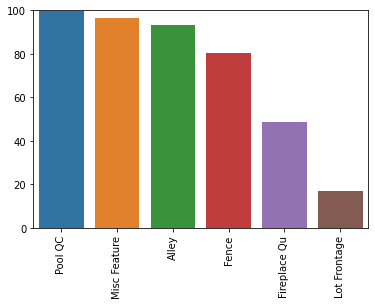

In [51]:
def barplotit(ylim = (0, 100)):
    percent_nan = percent_missing(df)
    sns.barplot(x=percent_nan.index, y=percent_nan)
    # Rotate the x ticks.
    plt.xticks(rotation=90)
    plt.ylim(ylim)
    
barplotit()

In [14]:
percent_nan[percent_nan < 1] # Our threshold for dropping under 1%

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [15]:
100 / len(df)

0.0341646737273659

In [17]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [18]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [19]:
# Only look at the rows where electrical and garage cars are null
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [20]:
percent_nan = percent_missing(df)

In [21]:
percent_nan[percent_nan < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

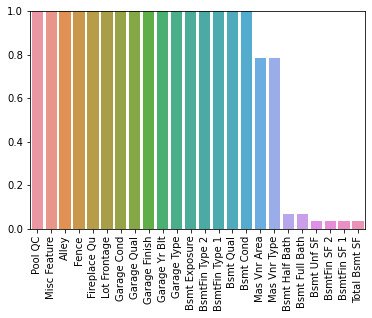

In [24]:
# Look at the barplot again.
barplotit()

In [25]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [26]:
df[df['Bsmt Full Bath'].isnull()] # same two rows missing info.

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [27]:
df[df['Bsmt Unf SF'].isnull()] # same THREE rows missing info.

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [28]:
# These houses just did not have a basement!
# So let's set the nulls to 0 given domain knowledge!

In [35]:
# For basement numeric columns
# fill na = 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

# Set the columns to the columns where NA has been filled by 0!!!!
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [36]:
# For basement string columns
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None") # .fillna()!

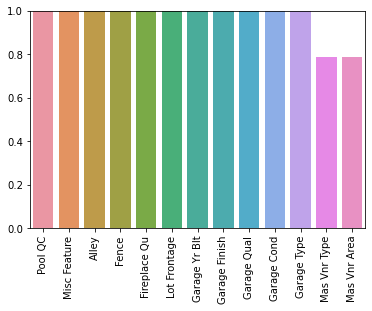

In [40]:
# Okay good now we have fixed rows.
barplotit()

In [42]:
# We need to now consider columns because we are missing so many values for these guys.
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna("None")

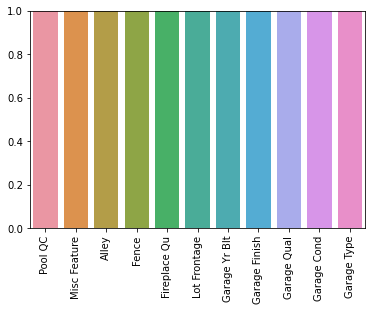

In [44]:
barplotit()

# Feature dropping or filling

In [45]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [46]:
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [47]:
percent_nan = percent_missing(df)

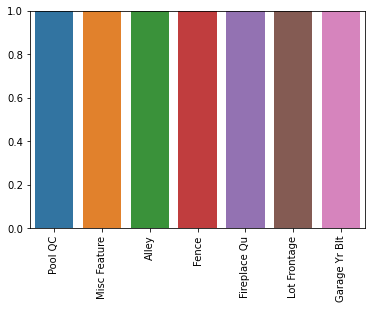

In [48]:
barplotit()

In [49]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [55]:
percent_nan = percent_missing(df)

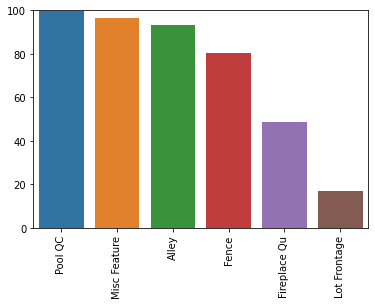

In [53]:
barplotit()

In [57]:
df = df.drop(['Pool QC', 'Misc Feature', 'Fence'], axis=1)

KeyError: "['Pool QC' 'Misc Feature' 'Fence'] not found in axis"

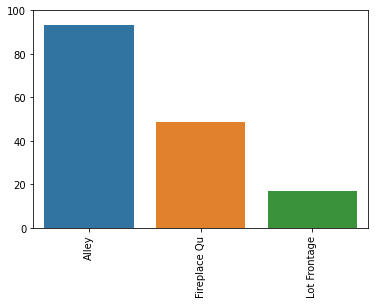

In [58]:
barplotit()

In [59]:
df = df.drop(['Alley'], axis=1)

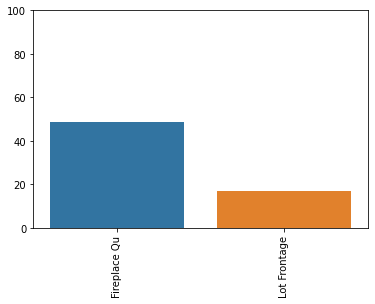

In [60]:
barplotit()

In [61]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [62]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

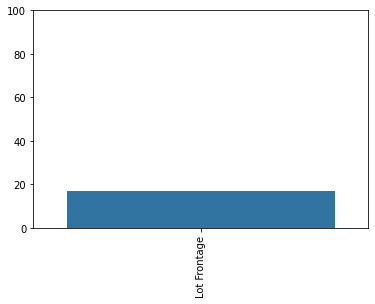

In [63]:
barplotit()

In [64]:
# How to fill in this data?
# What is the best estimation we can use?
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
123.0      1
155.0      1
144.0      1
137.0      1
31.0       1
Name: Lot Frontage, Length: 128, dtype: int64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

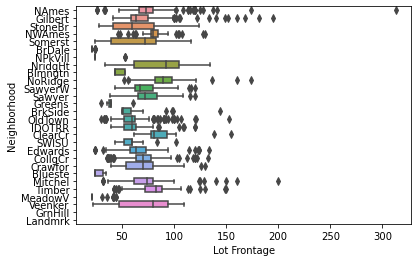

In [66]:
# We can use the neighbourhood value.
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [67]:
mean_frontage_values = df.groupby('Neighborhood')['Lot Frontage']

In [68]:
mean_frontage_values

In [70]:
# Allows us to take the value of the row and fill rows using custom func
df['Lot Frontage'] = mean_frontage_values.transform(lambda value: value.fillna(value.mean()))

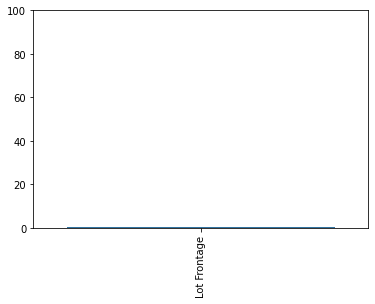

In [71]:
# Cleaned data!
barplotit()

In [72]:
# Fill in 0s for last 3 rows
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [73]:
# Cleaned data!
barplotit()

ValueError: min() arg is an empty sequence